<IPython.core.display.Javascript object>

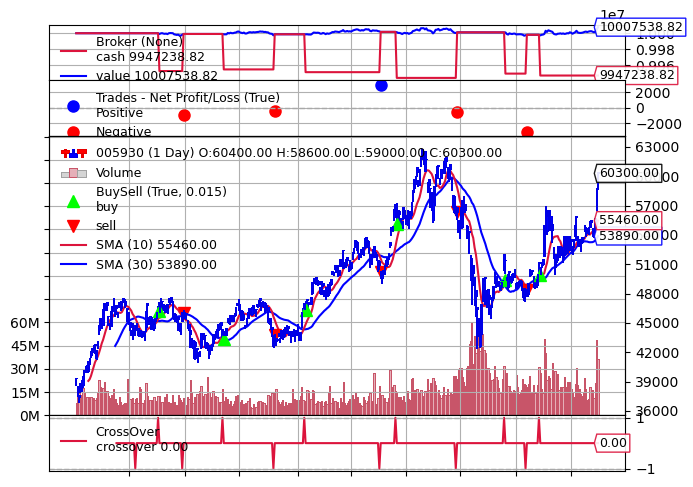

In [97]:
from datetime import datetime
import backtrader as bt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 전략
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)
        


cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

data = bt.feeds.GenericCSVData(
            dataname="005930.csv",

            fromdate=datetime(2019, 1, 2),
            todate=datetime(2020, 7, 30),

            nullvalue=0.0,

            dtformat=('%Y-%m-%d'),
            #tmformat=('%I-%p'),

            datetime=0,
            time=-1,
            high=3,
            low=4,
            open=2,
            close=1,
            volume=5,
            openinterest=-1,

                        headers = True,
                        separator = ','
        )
cerebro.adddata(data)

cerebro.broker.setcash(10000000) # 초기 투자 자금 설정 : 천만원
cerebro.broker.setcommission(commission=0.0014) 
cerebro.run()
cerebro.plot(style="candle", barup="red", bardown="blue", figsize=(10,40))[0][0]

Initial Portfolio Value : 10,000,000 KRW
[2019-05-15] BUY  : 주가 43,050, 수량 218, 수수료 13,134, 자산 9,910,595
[2019-07-01] SELL : 주가 47,400, 수량 -218, 수수료 14,461, 자산 10,920,347
[2020-03-16] BUY  : 주가 50,900, 수량 207, 수수료 14,760, 자산 10,739,883
Final Portfolio Value   : 12,852,608 KRW


<IPython.core.display.Javascript object>

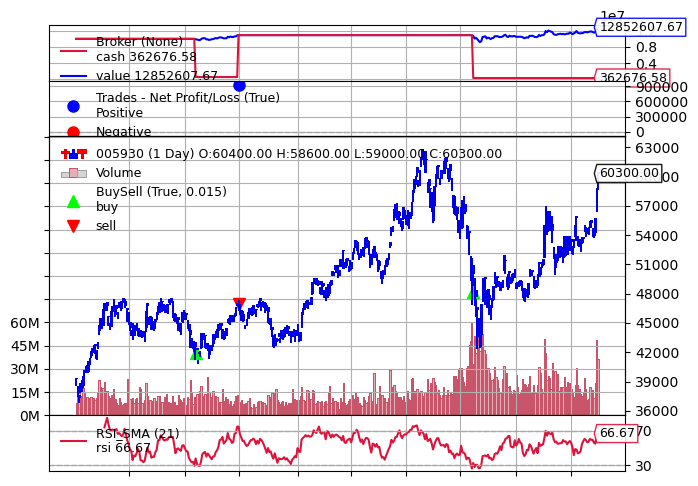

In [103]:
import backtrader as bt
#import yfinance as yf

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '        
                    f'자산 {cerebro.broker.getvalue():,.0f}')
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}')
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')
    
data = bt.feeds.GenericCSVData(
            dataname="005930.csv",

            fromdate=datetime(2019, 1, 2),
            todate=datetime(2020, 7, 30),

            nullvalue=0.0,

            dtformat=('%Y-%m-%d'),
            #tmformat=('%I-%p'),

            datetime=0,
            time=-1,
            high=3,
            low=4,
            open=2,
            close=1,
            volume=5,
            openinterest=-1,

                        headers = True,
                        separator = ','
        )

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
# data = bt.feeds.YahooFinanceData(dataname='036570.KS', fromdate=datetime(2017, 1, 1), todate=datetime(2019, 12, 1))
# data = bt.feeds.PandasData(dataname='005930.csv')

cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.plot(style='candlestick')[0][0]

In [83]:
cerebro.broker.get_value()

10007538.819999997

In [87]:
df = pd.read_csv('kospi200_raw.csv', index_col=0)

In [90]:
df.to_csv("test.csv", mode='w',encoding='utf-8')